<a href="https://colab.research.google.com/github/somitrasingh/machine_learning/blob/main/Counterfeit_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

# Replace with your actual values
os.environ['KAGGLE_USERNAME'] = 'somitra07'
os.environ['KAGGLE_KEY'] = '319b54744b938ac561d3e6b01cbd4791'

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aimlveera/counterfeit-product-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/counterfeit-product-detection-dataset


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/aimlveera/counterfeit-product-detection-dataset/versions/1/_counterfeit_transactions.csv')

In [ ]:
df.shape

(3000, 20)

In [ ]:
df.isnull().sum()

,0
transaction_id,0
customer_id,0
transaction_date,0
customer_age,0
customer_location,0
quantity,0
unit_price,0
total_amount,0
payment_method,0
shipping_speed,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.sample(5)

,transaction_id,customer_id,transaction_date,customer_age,customer_location,quantity,unit_price,total_amount,payment_method,shipping_speed,customer_history_orders,discount_applied,discount_percentage,shipping_cost,delivery_time_days,refund_requested,velocity_flag,geolocation_mismatch,device_fingerprint_new,involves_counterfeit
204,TXN_130500,CUST_59294,2025-04-24 17:34:19,34,DE,1,247.09,247.09,Apple Pay,Express,29,False,0.0,19.44,26,False,False,False,False,False
1202,TXN_743824,CUST_89124,2024-09-02 03:30:14,68,CA,3,223.23,669.70,PayPal,Standard,36,False,0.0,17.17,9,False,False,False,False,False
296,TXN_999353,CUST_70586,2024-08-03 23:34:40,65,FR,13,6.84,88.89,Credit Card,Economy,3,True,6.4,8.66,12,False,False,False,False,True
486,TXN_246486,CUST_88283,2025-06-20 03:55:37,67,FR,16,75.58,1209.22,Cryptocurrency,Economy,4,False,0.0,18.98,17,True,False,True,False,True
1011,TXN_967746,CUST_30449,2025-04-02 03:48:52,41,IN,2,146.95,293.91,Debit Card,Priority,31,True,5.2,8.99,29,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           3000 non-null   object 
 1   customer_id              3000 non-null   object 
 2   transaction_date         3000 non-null   object 
 3   customer_age             3000 non-null   int64  
 4   customer_location        3000 non-null   object 
 5   quantity                 3000 non-null   int64  
 6   unit_price               3000 non-null   float64
 7   total_amount             3000 non-null   float64
 8   payment_method           3000 non-null   object 
 9   shipping_speed           3000 non-null   object 
 10  customer_history_orders  3000 non-null   int64  
 11  discount_applied         3000 non-null   bool   
 12  discount_percentage      3000 non-null   float64
 13  shipping_cost            3000 non-null   float64
 14  delivery_time_days      

In [ ]:
df['shipping_speed'].value_counts()

,count
shipping_speed,
Standard,1099
Express,798
Priority,705
Economy,398


In [ ]:
df['payment_method'].value_counts()

,count
payment_method,
PayPal,771
Credit Card,760
Apple Pay,554
Debit Card,550
Wire Transfer,194
Cryptocurrency,171


In [ ]:
df['customer_location'].value_counts()

,count
customer_location,
GB,325
MX,313
DE,312
CA,307
BR,304
JP,301
IN,301
AU,288
US,281


In [ ]:
df['transaction_id'].value_counts()

,count
transaction_id,
TXN_152377,2
TXN_729253,2
TXN_413571,2
TXN_273438,1
TXN_704210,1
...,...
TXN_211683,1
TXN_138791,1
TXN_125025,1


In [ ]:
df['customer_id'].value_counts()

,count
customer_id,
CUST_23163,3
CUST_25554,2
CUST_10310,2
CUST_45271,2
CUST_38358,2
...,...
CUST_54116,1
CUST_41856,1
CUST_85805,1


In [ ]:
df.drop(columns=['customer_id', 'transaction_id'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_date         3000 non-null   object 
 1   customer_age             3000 non-null   int64  
 2   customer_location        3000 non-null   object 
 3   quantity                 3000 non-null   int64  
 4   unit_price               3000 non-null   float64
 5   total_amount             3000 non-null   float64
 6   payment_method           3000 non-null   object 
 7   shipping_speed           3000 non-null   object 
 8   customer_history_orders  3000 non-null   int64  
 9   discount_applied         3000 non-null   bool   
 10  discount_percentage      3000 non-null   float64
 11  shipping_cost            3000 non-null   float64
 12  delivery_time_days       3000 non-null   int64  
 13  refund_requested         3000 non-null   bool   
 14  velocity_flag           

In [ ]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_date         3000 non-null   datetime64[ns]
 1   customer_age             3000 non-null   int64         
 2   customer_location        3000 non-null   object        
 3   quantity                 3000 non-null   int64         
 4   unit_price               3000 non-null   float64       
 5   total_amount             3000 non-null   float64       
 6   payment_method           3000 non-null   object        
 7   shipping_speed           3000 non-null   object        
 8   customer_history_orders  3000 non-null   int64         
 9   discount_applied         3000 non-null   bool          
 10  discount_percentage      3000 non-null   float64       
 11  shipping_cost            3000 non-null   float64       
 12  delivery_time_days       3000 non-

In [ ]:
duration = df['transaction_date'].max() - df['transaction_date'].min()
duration

Timedelta('364 days 17:24:48')

In [ ]:
df['day'] = df['transaction_date'].dt.weekday

In [ ]:
df['day'].dtype

dtype('int32')

In [ ]:
df['day'] = df['day'].replace({0:0,1:0,2:0,3:0,4:1,5:1,6:0})

In [ ]:
df['day'].value_counts()

,count
day,
0,2167
1,833


In [ ]:
df.drop(columns=['transaction_date'], inplace=True)

<Axes: xlabel='quantity', ylabel='Density'>

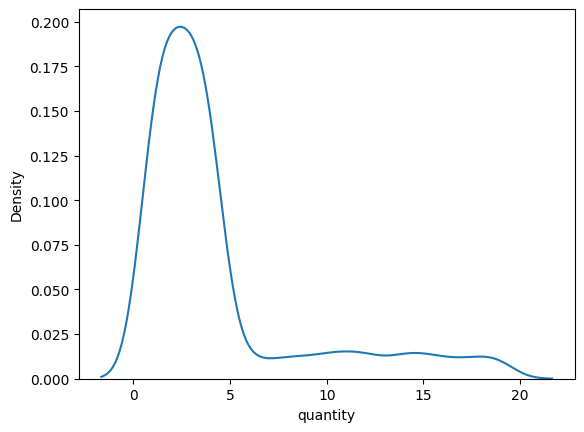

In [ ]:
sns.kdeplot(df['quantity'])

In [ ]:
pd.crosstab(df['quantity'],df['involves_counterfeit'])

involves_counterfeit,False,True
quantity,,
1,595,35
2,567,29
3,566,38
4,539,44
5,0,31
6,0,39
7,0,26
8,0,43
9,0,34


In [ ]:
df['quantity'] = np.where(df['quantity'] <= 4, 0, 1)

In [ ]:
df['quantity'].value_counts()

,count
quantity,
0,2413
1,587


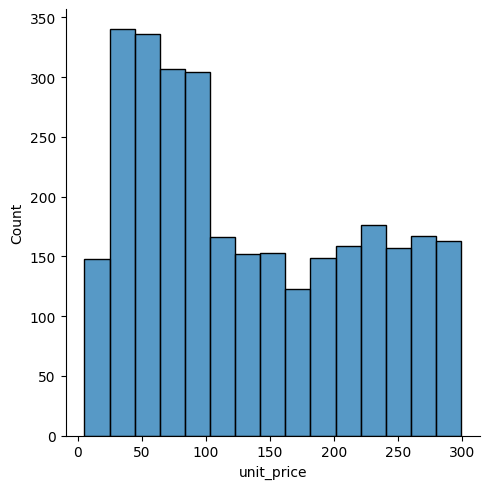

In [ ]:
sns.displot(df['unit_price'])

## To normalize:
df['unit_price']
df['total_amount']

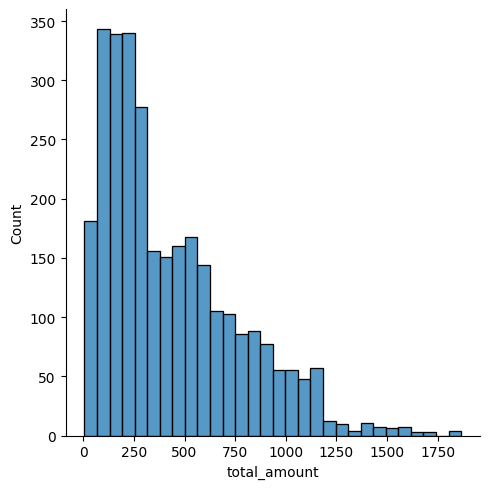

In [ ]:
sns.displot(df['total_amount'])

In [ ]:
df['total_amount'].quantile(0.95)

np.float64(1085.4574999999986)

<Axes: xlabel='involves_counterfeit', ylabel='total_amount'>

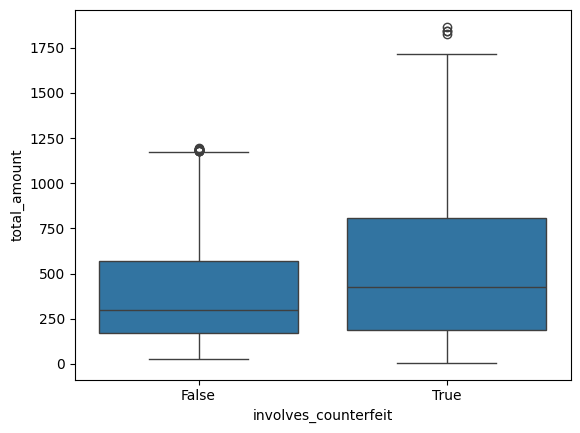

In [ ]:
sns.boxplot(x=df['involves_counterfeit'],y=df['total_amount'])

In [ ]:
non_counterfiet = df[df['involves_counterfeit']==False]['total_amount']

In [ ]:
first_quarter = non_counterfiet.quantile(0.25)
third_quarter = non_counterfiet.quantile(0.75)
iqr = third_quarter - first_quarter
upper_limit = iqr + 1.5 * iqr
upper_limit

np.float64(1006.3874999999999)

In [ ]:
df['total_amount'] = np.where(df['total_amount'] > upper_limit, 1007, df['total_amount'])

<Axes: xlabel='involves_counterfeit', ylabel='total_amount'>

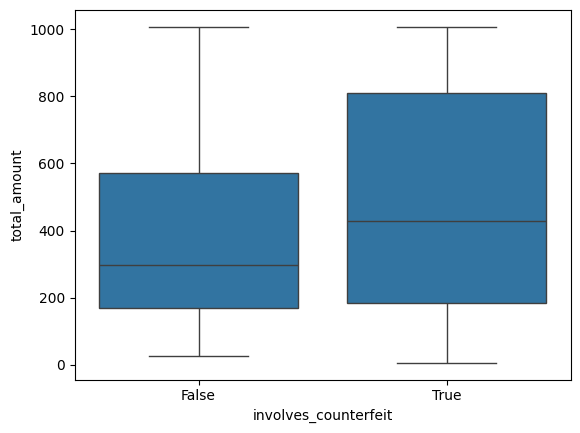

In [ ]:
sns.boxplot(x=df['involves_counterfeit'],y=df['total_amount'])

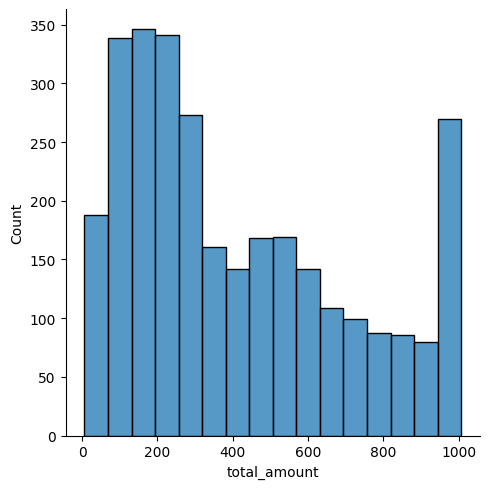

In [ ]:
sns.displot(df['total_amount'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_age             3000 non-null   int64  
 1   customer_location        3000 non-null   object 
 2   quantity                 3000 non-null   int64  
 3   unit_price               3000 non-null   float64
 4   total_amount             3000 non-null   float64
 5   payment_method           3000 non-null   object 
 6   shipping_speed           3000 non-null   object 
 7   customer_history_orders  3000 non-null   int64  
 8   discount_applied         3000 non-null   bool   
 9   discount_percentage      3000 non-null   float64
 10  shipping_cost            3000 non-null   float64
 11  delivery_time_days       3000 non-null   int64  
 12  refund_requested         3000 non-null   bool   
 13  velocity_flag            3000 non-null   bool   
 14  geolocation_mismatch    

<Axes: xlabel='customer_history_orders', ylabel='Density'>

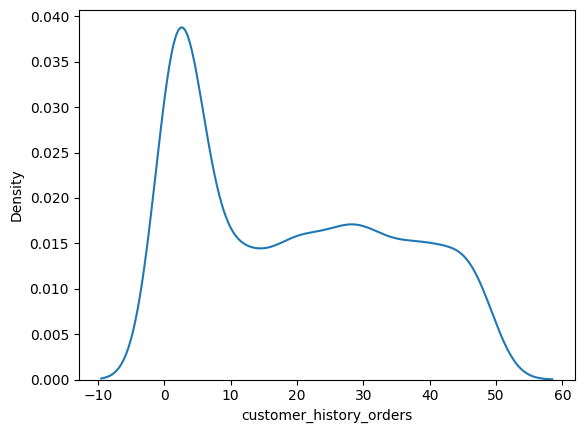

In [ ]:
sns.kdeplot(df['customer_history_orders'])

<Axes: xlabel='discount_percentage', ylabel='Density'>

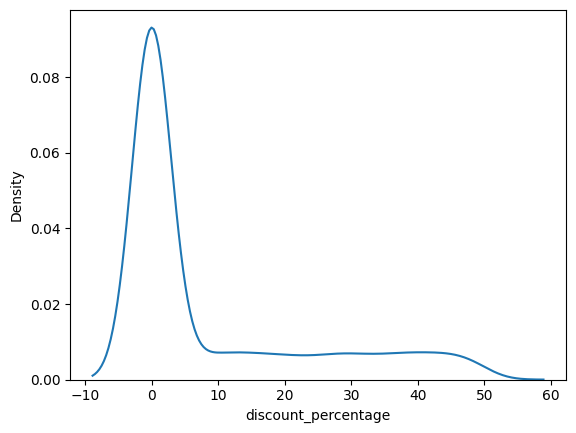

In [ ]:
sns.kdeplot(df['discount_percentage'])

<Axes: xlabel='involves_counterfeit', ylabel='discount_percentage'>

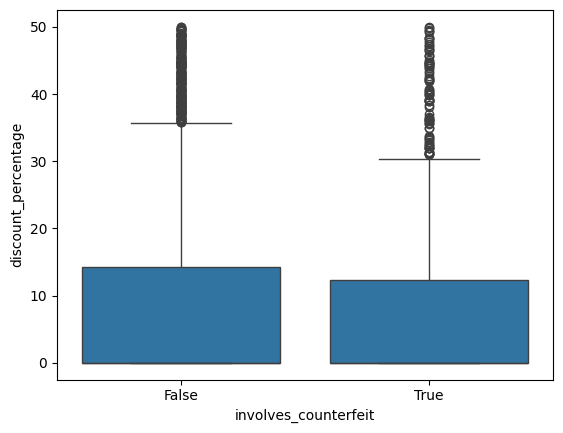

In [ ]:
sns.boxplot(x=df['involves_counterfeit'], y=df['discount_percentage'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_age             3000 non-null   int64  
 1   customer_location        3000 non-null   object 
 2   quantity                 3000 non-null   int64  
 3   unit_price               3000 non-null   float64
 4   total_amount             3000 non-null   float64
 5   payment_method           3000 non-null   object 
 6   shipping_speed           3000 non-null   object 
 7   customer_history_orders  3000 non-null   int64  
 8   discount_applied         3000 non-null   bool   
 9   discount_percentage      3000 non-null   float64
 10  shipping_cost            3000 non-null   float64
 11  delivery_time_days       3000 non-null   int64  
 12  refund_requested         3000 non-null   bool   
 13  velocity_flag            3000 non-null   bool   
 14  geolocation_mismatch    

In [ ]:
df['shipping_speed'].value_counts()

,count
shipping_speed,
Standard,1099
Express,798
Priority,705
Economy,398


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['involves_counterfeit']), df['involves_counterfeit'], test_size=0.2, random_state=42)

In [ ]:
trf1 = ColumnTransformer([
    ('ordinal', OrdinalEncoder(categories=[['Economy', 'Standard', 'Express', 'Priority']]),[6]),
    ('ohe', OneHotEncoder(drop='first', sparse_output=False),[1,5])
])

In [ ]:
pipe = make_pipeline(trf1, RandomForestClassifier())

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Standard',
                                                                              'Express',
                                                                              'Priority']]),
                                                  [6]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [1, 5])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score
r2_score(y_test, y_pred)

0.6710526315789473

In [ ]:
confusion_matrix(y_test,y_pred)

array([[451,   5],
       [ 31, 113]])

In [ ]:
accuracy_score(y_test, y_pred)

0.94

In [ ]:
from xgboost import XGBClassifier

In [ ]:
pipe2 = make_pipeline(trf1, XGBClassifier())

In [ ]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Standard',
                                                                              'Express',
                                                                              'Priority']]),
                                                  [6]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [1, 5])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsamp...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
y_pred2 = pipe2.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.94

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
pipe3 = make_pipeline(trf1, XGBClassifier())

In [ ]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Standard',
                                                                              'Express',
                                                                              'Priority']]),
                                                  [6]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [1, 5])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsamp...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
y_pred3 = pipe3.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred3)

0.94